Time series forecasting is basically the machine learning modeling for Time Series data (years, days, hours…etc.)for predicting future values using Time Series modeling .This helps if your data in serially correlated.

**Overview of the tutorial**
 
1.   What makes Time Series Special?
2.   Loading and Handling Time Series in Pandas
3.   How to Check Stationarity of a Time Series?
4.   How to make a Time Series Stationary?
5.   Forecasting a Time Series


    
    
    

**1. What makes Time Series Special?**

1.  It is time dependent.
2.  seasonality trends, i.e. cycle

**2. Loading and Handling Time Series in Pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
from numpy import mean
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import pandas as pd
import statsmodels
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
import statsmodels.api
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
from datetime import datetime


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AirPassengers.csv')


In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
print ('\n Data Types:')
print (data.dtypes)


 Data Types:
Month          object
#Passengers     int64
dtype: object


The data contains a particular month and number of passengers travelling in that month .The data type here is object (month) Let’s convert it into a Time series object and use the Month column as our index.

In [ ]:

con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

You can see that now the data type is ‘datetime64[ns]’.Now let’s just make it into a series rather than a data frame

In [ ]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [ ]:
#specific to the index
ts['1949-01-01']

In [ ]:
#For range
ts['1949-01-01':'1949-05-01']

In [ ]:
#if one index is at the end
ts[:'1949-05-01']

In [ ]:
#All rows of 1949
ts['1949']


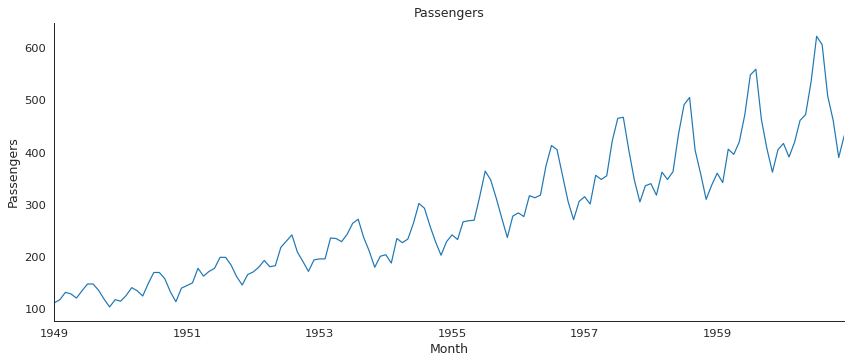

In [ ]:
#Passenger PLOT
data.plot(figsize=(12,5))
plt.ylabel('Passengers')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Passengers')
sns.despine(top=True)
plt.show()

In [ ]:
month_arr = []
year_arr = []
year = 1949
indexCol = []
for i in range(len(data['#Passengers'])):
  year_arr.append(year)
  indexCol.append(i+1)
  if((i+1)%12>0):
    month_arr.append((i+1)%12)
  else:
    month_arr.append(12)
    year = year + 1

In [ ]:
data['Month_num'] = month_arr
data['Year_num'] = year_arr
data['indexCol'] = indexCol

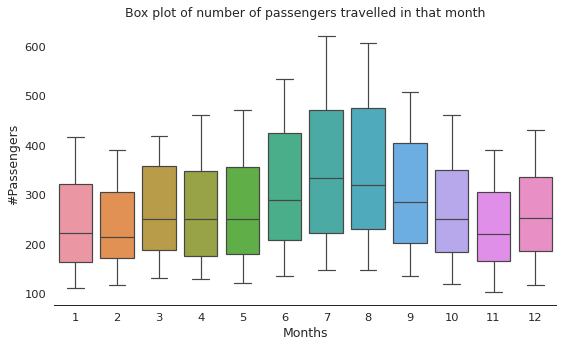

In [ ]:
#Box plot 
plt.figure(figsize=(8,5))
#plt.subplot(1,2,1)
#plt.subplots_adjust(wspace=0.5)
sns.boxplot(x="Month_num", y="#Passengers", data=data)
plt.xlabel('Months')
plt.title('Box plot of number of passengers travelled in that month')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Passengers_monthly.pdf', dpi=1400)
plt.show()

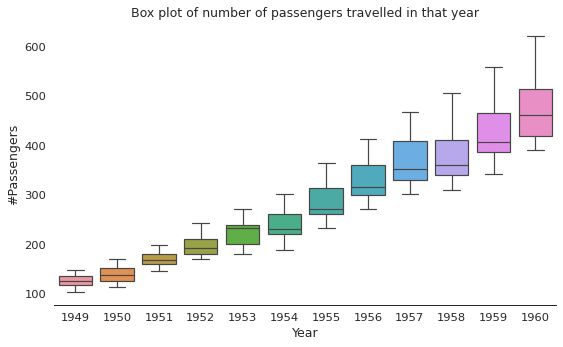

In [ ]:
#Box plot 
plt.figure(figsize=(8,5))
#plt.subplot(1,2,1)
#plt.subplots_adjust(wspace=0.5)
sns.boxplot(x="Year_num", y="#Passengers", data=data)
plt.xlabel('Year')
plt.title('Box plot of number of passengers travelled in that year')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Passengers_year.pdf', dpi=1400)
plt.show()

In [ ]:

from scipy import stats
stat, p = stats.normaltest(data['#Passengers'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=8.655, p=0.013
Data does not look Gaussian (reject H0)


We can also calculate Kurtosis and Skewness, to determine if the data distribution departs from the normal distribution.

Kurtosis of normal distribution: -0.39377217091281036
Skewness of normal distribution: 0.577068234901525


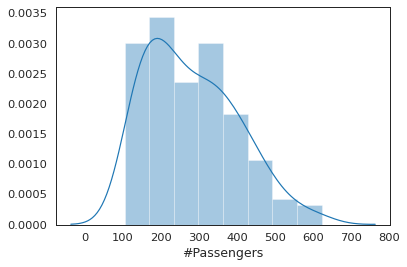

In [ ]:
sns.distplot(data['#Passengers']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data['#Passengers'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data['#Passengers'])))

**Kurtosis**: describes heaviness of the tails of a distribution

Normal Distribution has a kurtosis of close to 0. If the kurtosis is greater than zero, then distribution has heavier tails. If the kurtosis is less than zero, then the distribution is light tails. And our Kurtosis is greater than zero.

**Skewness**: measures asymmetry of the distribution

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed. And our skewness is greater than 1

In [ ]:
data

,#Passengers,Month_num,Year_num,indexCol
Month,,,,
1949-01-01,112,1,1949,1
1949-02-01,118,2,1949,2
1949-03-01,132,3,1949,3
1949-04-01,129,4,1949,4
1949-05-01,121,5,1949,5
...,...,...,...,...
1960-08-01,606,8,1960,140
1960-09-01,508,9,1960,141
1960-10-01,461,10,1960,142


define the number of test data and divide complete dataset into test and train


In [ ]:
number_of_test = 24

no_of_train = len(data['#Passengers'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['#Passengers'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['#Passengers'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

**3. How to Check Stationarity of a Time Series?**

**STATIONARITY** (**But why is it important?**)

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series. There are a lot of statistical theories to explore stationary series than non-stationary series

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

*   constant mean
*   constant variance
* an auto co-variance that does not depend on time



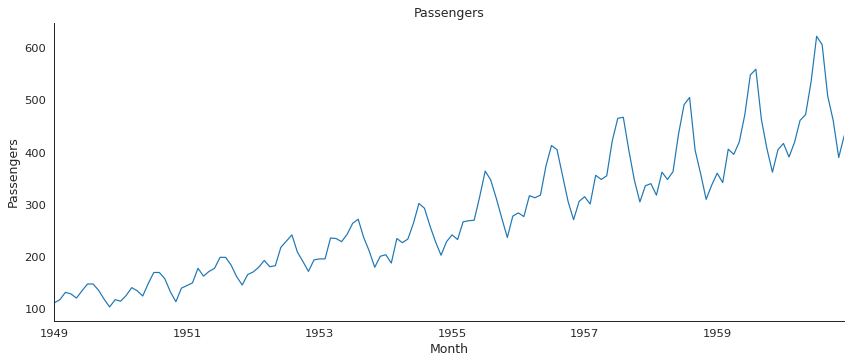

In [ ]:
#Passenger PLOT
data['#Passengers'].plot(figsize=(12,5))
plt.ylabel('Passengers')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Passengers')
sns.despine(top=True)
plt.show()

It’s clear from the plot that there is an overall upward trend,with some seasonality in it

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

**Dickey-fuller Test** :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, i.e. we can reject the null hypothesis and say that this Time series is indeed stationary

In [ ]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

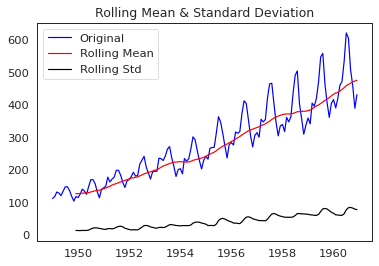

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data['#Passengers'])

This is not stationary because :

*   mean is increasing even though the std is small
*   Test stat is > critical value


In [ ]:
#test_stationarity(df_train['W'])

In [ ]:
#test_stationarity(df_test['W'])

4.  **MAKING THE TIME SERIES STATIONARY**

There are two major factors that make a time series non-stationary. They are:


*   **Trend**: non-constant mean
*   **Seasonality**: Variation at specific time-frames


The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated



**Trend**

The first step is to reduce the trend using transformation, as we can see from the previous plots that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation

In [ ]:
data['#Passengers']
ts = data['#Passengers']

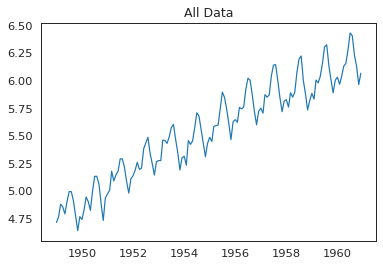

In [ ]:
# plot logarithm of complete data, test data and train data
all_data_log = np.log(data['#Passengers'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()
# plt.plot(train_log)
# plt.title("Train Data")
# plt.show()
# plt.plot(test_log)
# plt.title("Test Data")

There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. The most common one is **Smoothing**: using rolling/moving average

**Smoothing:** In smoothing we usually take the past few instances (rolling estimates). **Moving average** method is most common method of smoothing. In this, first take x consecutive values and this depends on the frequency if it is 1 year we take 12 values.

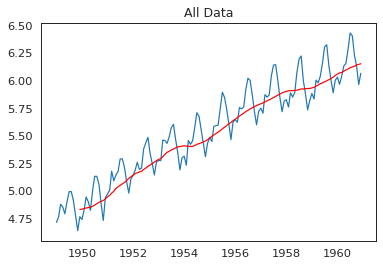

In [ ]:
# Plot logarithm of data with moving average of data for all data, train data and test data
moving_avg = all_data_log.rolling(window=12).mean()
plt.plot(all_data_log)
plt.title("All Data")
plt.plot(moving_avg,color='red')
plt.show()

# moving_avg_train = train_log.rolling(window=12).mean()
# plt.plot(train_log)
# plt.title("Train Data")
# plt.plot(moving_avg_train,color='red')
# plt.show()

# moving_avg_test = test_log.rolling(window=12).mean()
# plt.plot(test_log)
# plt.plot("Test Data")
# plt.plot(moving_avg_test,color='red')
# plt.show()

Now subtract the rolling mean from the original series

In [ ]:
ts_log_moving_avg_diff = all_data_log - moving_avg
print(ts_log_moving_avg_diff)
ts_log_moving_avg_diff.head(24)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64


Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
Name: #Passengers, dtype: float64

The reason there are null values is because we take the average of first 12 so 11 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis

In [ ]:
# remove all NaN fields
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Let's check for stationarity

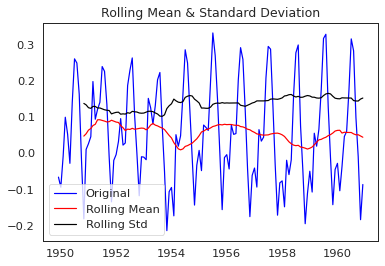

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
# plot original vs rolling mean vs rolling standard deviation of the difference obtained above
test_stationarity(ts_log_moving_avg_diff)

Here, we notice two things:

*   The rolling values are varying slightly but there is no specific trend
*   The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary



**Seasonality (along with Trend)**
Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:


*  **Differencing**: by taking difference using time lag
*   **Decomposition**: model both trend and seasonality, then remove them



**Differencing**:

Here we first take the difference of the value at a particular time with that of the previous time

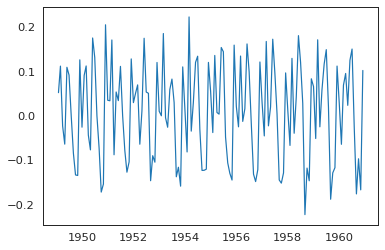

In [ ]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

Let’s  check stationarity 

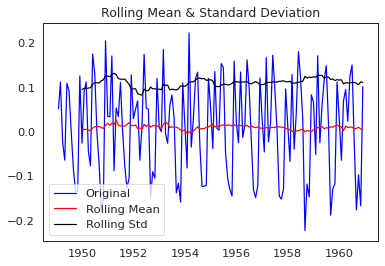

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
#remove Nan from obtained differenced series 
# and plot the original versus rolling mean verss rolling standard deviation
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

It is stationary because:

*   the mean and std variations have small variations with time
*   test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary



**Decomposing**:
Here we model both the trend and the seasonality, then the remaining part of the time series is returned

In [ ]:
#polpulate the index column
no_ALL_Data = len(all_data_log)
print(no_ALL_Data)
indexCol = []
for i in range (no_ALL_Data):
    indexCol.append(i+1)
df_All_Data = pd.DataFrame()
df_All_Data['0'] = indexCol
df_All_Data['W'] = data['#Passengers'][:no_ALL_Data]

144


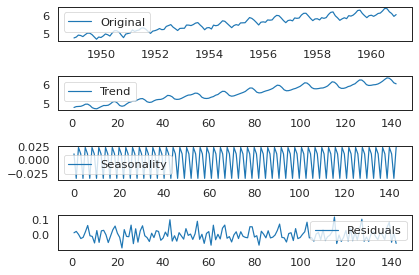

In [ ]:
#Decomposition of logarithm of data into trend, seasonality and residuals


decomposed = seasonal_decompose(np.asarray(all_data_log), freq=3)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.subplot(411)
plt.plot(all_data_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


In [ ]:
# divide the differenced series into train and test
df_train['W_diff'] = ts_log_diff[0:no_of_train]
df_test['W_diff'] = ts_log_diff[no_of_train:]
data['W_diff'] = ts_log_diff

Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

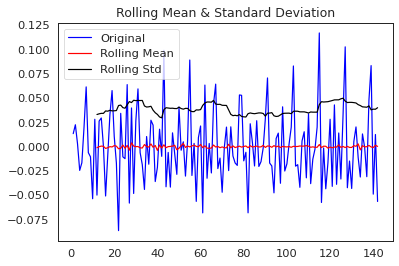

Results of Dickey-Fuller Test:
Test Statistic                -8.397413e+00
p-value                        2.279195e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [ ]:
#Store the residual series and plot it's rolling mean and rolling standard deviation
df_temp = pd.DataFrame()
df_temp['W'] = residual
df_temp['W'].dropna(inplace = True)
ts_log_decompose = df_temp['W']
test_stationarity(ts_log_decompose)

This is stationary because:

*   test statistic is lower than 1% critical values
*   the mean and std variations have small variations with time



5.  **Forecasting a Time Series**

**Choosing a model**



*   Exponential smoothings methods are appropriate for non-stationary data (ie data with a trend and seasonal data).


*   ARIMA models should be used on stationary data only. One should therefore remove the trend of the data (via deflating or logging), and then look at the differenced series.



**Smoothing methods**

Smoothing methods work as weighted averages. Forecasts are weighted averages of past observations. The weights can be uniform (this is a moving average), or following an exponential decay — this means giving more weight to recent observations and less weight to old observations. More advanced methods include other parts in the forecast, like seasonal components and trend components

**Simple Exponential Smoothing** (SES):


*   When to use?

>  > Few data points, Irregular data, No seasonality or trend.

**Holt’s Linear Smoothing**:
* When to use?
>Trend in data, No seasonality






In [ ]:
normalized = data['W_diff'].values

In [ ]:
normalized1d=[]
for i in range(1,len(normalized)):
    normalized1d.append(normalized[i])

In [ ]:
data.columns

Index(['#Passengers', 'Month_num', 'Year_num', 'indexCol', 'W_diff'], dtype='object')

In [ ]:
# Exponential smoothing
size = int(len(ts_log_moving_avg_diff) - 24)
train, test = ts_log_moving_avg_diff[0:size], ts_log_moving_avg_diff[size:len(normalized1d)]
history = [x for x in train]
model = SimpleExpSmoothing(np.asarray(train))

fit1 = model.fit()
pred1 = fit1.forecast(24)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(24)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(24)

In [ ]:
temp = []
for i in range(len(pred1)):
    temp.append(pred1[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test1 = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred1 = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:

for k in range(len(inverse_test1)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred1[k], inverse_test1[k]))

error = sqrt(mean_squared_error(inverse_test1, inverse_pred1))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=337.895387, expected=360.000000
counter=2.000000, predicted=360.895387, expected=342.000000
counter=3.000000, predicted=342.895387, expected=406.000000
counter=4.000000, predicted=406.895387, expected=396.000000
counter=5.000000, predicted=396.895387, expected=420.000000
counter=6.000000, predicted=420.895387, expected=472.000000
counter=7.000000, predicted=472.895387, expected=548.000000
counter=8.000000, predicted=548.895387, expected=559.000000
counter=9.000000, predicted=559.895387, expected=463.000000
counter=10.000000, predicted=463.895387, expected=407.000000
counter=11.000000, predicted=407.895387, expected=362.000000
counter=12.000000, predicted=362.895387, expected=405.000000
counter=13.000000, predicted=405.895387, expected=417.000000
counter=14.000000, predicted=417.895387, expected=391.000000
counter=15.000000, predicted=391.895387, expected=419.000000
counter=16.000000, predicted=419.895387, expected=461.000000
counter=17.000000, predicted=461.

Text(0, 0.5, 'W')

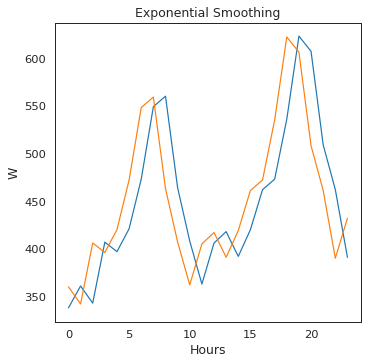

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred1)
plt.plot(inverse_test1)
axarr.set_title('Exponential Smoothing')
plt.xlabel('Hours')
plt.ylabel('W')

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values


We will mainly use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.

Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model 

Where,


*   p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3)
*   q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3)
* d :This is the number of differences or the number of non-seasonal differences

To find out the value of p and q, we use two popular plotting techniques; they are:



*   **Autocorrelation Function (ACF)**: It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4
*   **Partial Autocorrelation Function (PACF)**: is used to measure the degree of association between y(t) and y(t-p)





/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


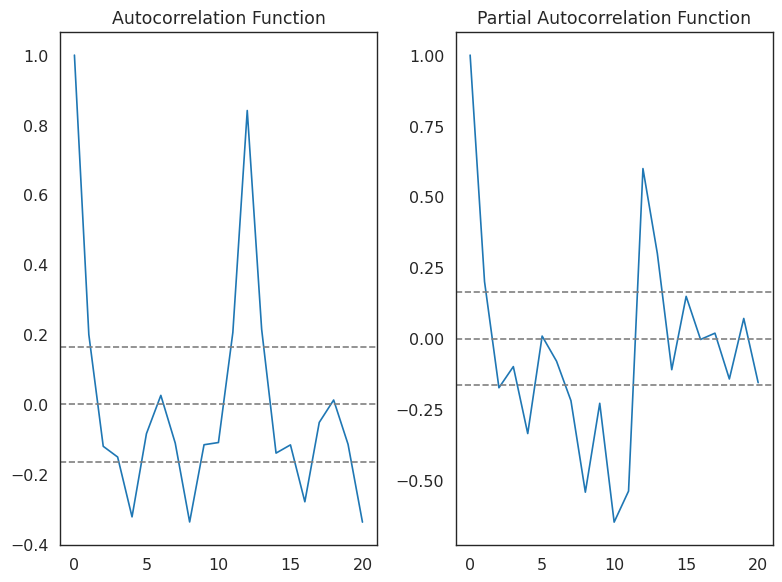

In [ ]:
#ACF and  PACF plots of differenced series
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
def estimated_autocorrelation(ts_log_diff):
   
    n = len(ts_log_diff)
    variance = ts_log_diff.var()
    ts_log_diff = ts_log_diff-ts_log_diff.mean()
    r = np.correlate(ts_log_diff, ts_log_diff, mode = 'full')[-n:]
    #assert np.allclose(r, np.array([(ts_log_diff[:n-k]*ts_log_diff[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [ ]:
lag_acf = estimated_autocorrelation(ts_log_diff)

Text(0.5, 1.0, 'Autocorrelation Function')

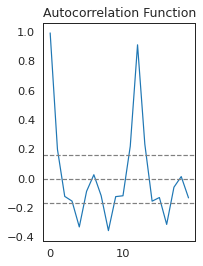

In [ ]:
#plot ACF
plt.subplot(121)
plt.plot(lag_acf[:20])
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

The two dotted lines on either sides of 0 are the confidence intervals. These can be used to determine the ‘p’ and ‘q’ values as:



*   p: The first time where the PACF crosses the upper confidence interval, here its close to 2. hence p = 2
*   q: The first time where the ACF crosses the upper confidence interval, here its close to 2. hence q = 2



using this make 4 different ARIMA models considering individual as well as combined effects

In [ ]:
#AR

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(normalized1d) - 24)
train, test = normalized1d[0:size], normalized1d[size:len(normalized1d)]
history = [x for x in train]
predictions = list()
#obs = history[len(history)-1]
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('counter=%f, predicted=%f, expected=%f' % (t+1, yhat, obs))


In [ ]:

temp = []
for i in range(len(predictions)):
    temp.append(predictions[i][0])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inversed_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inversed_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:

for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.000665, expected=360.000000
counter=2.000000, predicted=361.000281, expected=342.000000
counter=3.000000, predicted=343.000446, expected=406.000000
counter=4.000000, predicted=407.127249, expected=396.000000
counter=5.000000, predicted=396.985376, expected=420.000000
counter=6.000000, predicted=421.089397, expected=472.000000
counter=7.000000, predicted=473.067820, expected=548.000000
counter=8.000000, predicted=549.124652, expected=559.000000
counter=9.000000, predicted=560.066025, expected=463.000000
counter=10.000000, predicted=463.939029, expected=407.000000
counter=11.000000, predicted=407.915854, expected=362.000000
counter=12.000000, predicted=362.869211, expected=405.000000
counter=13.000000, predicted=406.018416, expected=417.000000
counter=14.000000, predicted=417.993048, expected=391.000000
counter=15.000000, predicted=391.997747, expected=419.000000
counter=16.000000, predicted=420.046142, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

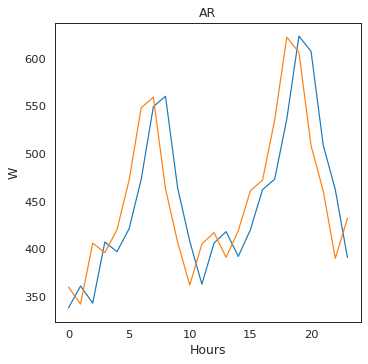

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inversed_pred)
plt.plot(inversed_test)
#df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
#df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('AR')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
#MA

size = int(len(normalized1d) - 24)
train, test = normalized1d[0:size], normalized1d[size:len(normalized1d)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))

inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:

for k in range(1,len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k, inverse_pred[k], inverse_test[k]))
    
error = sqrt(mean_squared_error(inverse_test[1:], inverse_pred[1:]))
print(error)
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=361.017248, expected=342.000000
counter=2.000000, predicted=342.989311, expected=406.000000
counter=3.000000, predicted=407.064363, expected=396.000000
counter=4.000000, predicted=396.990283, expected=420.000000
counter=5.000000, predicted=421.029888, expected=472.000000
counter=6.000000, predicted=473.037959, expected=548.000000
counter=7.000000, predicted=549.048502, expected=559.000000
counter=8.000000, predicted=560.010916, expected=463.000000
counter=9.000000, predicted=463.960803, expected=407.000000
counter=10.000000, predicted=407.986339, expected=362.000000
counter=11.000000, predicted=362.978430, expected=405.000000
counter=12.000000, predicted=406.048436, expected=417.000000
counter=13.000000, predicted=418.005936, expected=391.000000
counter=14.000000, predicted=391.989639, expected=419.000000
counter=15.000000, predicted=420.032852, expected=461.000000
counter=16.000000, predicted=462.030426, expected=472.000000
counter=17.000000, predicted=473.

Text(0, 0.5, 'W')

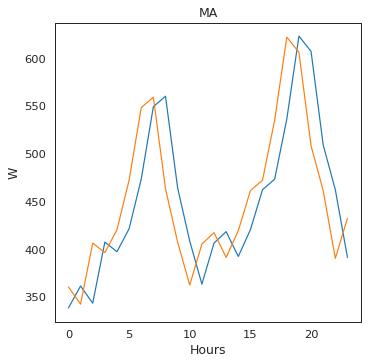

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
#df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
#df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('MA')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
# ARMA 
size = int(len(normalized1d) - 24)
train, test = normalized1d[0:size], normalized1d[size:len(normalized1d)]
history = [x for x in train]
predictions = list()
#obs = history[len(history)-1]
for t in range(len(test)):
    model = ARMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.predict(len(history),len(history))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:

for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.045120, expected=360.000000
counter=2.000000, predicted=360.999837, expected=342.000000
counter=3.000000, predicted=342.977020, expected=406.000000
counter=4.000000, predicted=407.045893, expected=396.000000
counter=5.000000, predicted=396.967243, expected=420.000000
counter=6.000000, predicted=421.015551, expected=472.000000
counter=7.000000, predicted=473.014588, expected=548.000000
counter=8.000000, predicted=549.014230, expected=559.000000
counter=9.000000, predicted=559.981854, expected=463.000000
counter=10.000000, predicted=463.957135, expected=407.000000
counter=11.000000, predicted=408.003363, expected=362.000000
counter=12.000000, predicted=362.993016, expected=405.000000
counter=13.000000, predicted=406.046089, expected=417.000000
counter=14.000000, predicted=417.988020, expected=391.000000
counter=15.000000, predicted=391.980754, expected=419.000000
counter=16.000000, predicted=420.026360, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

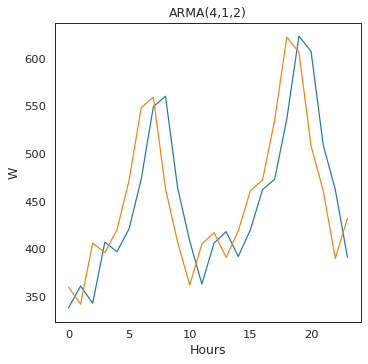

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
#df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
#df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(4,1,2)')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
#ARIMA
size = int(len(normalized1d) - 24)
train, test = normalized1d[0:size], normalized1d[size:len(normalized1d)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:

for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.067815, expected=360.000000
counter=2.000000, predicted=360.990989, expected=342.000000
counter=3.000000, predicted=343.005817, expected=406.000000
counter=4.000000, predicted=407.065698, expected=396.000000
counter=5.000000, predicted=396.967440, expected=420.000000
counter=6.000000, predicted=421.062869, expected=472.000000
counter=7.000000, predicted=473.011729, expected=548.000000
counter=8.000000, predicted=549.055135, expected=559.000000
counter=9.000000, predicted=559.990330, expected=463.000000
counter=10.000000, predicted=463.979748, expected=407.000000
counter=11.000000, predicted=408.006202, expected=362.000000
counter=12.000000, predicted=362.984763, expected=405.000000
counter=13.000000, predicted=406.068639, expected=417.000000
counter=14.000000, predicted=417.984327, expected=391.000000
counter=15.000000, predicted=392.014467, expected=419.000000
counter=16.000000, predicted=420.034392, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

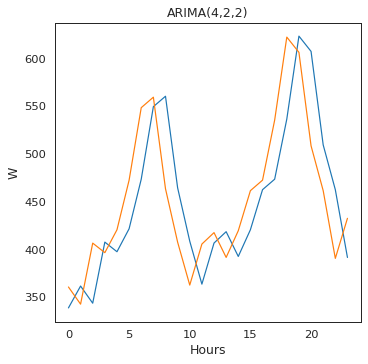

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
#df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
#df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(4,2,2)')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
# Optimize ARIMA parameters
aicVal=[]
for d in range(1,5):
    for ari in range(0, 5):
        for maj in range(0,5):
            try:
                arima_obj = ARIMA(normalized1d, order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit(maxlag=30, method='css', trend='nc')  
                if(len(aicVal)==0):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                elif(aicVal[len(aicVal)-1][3]>arima_obj_fit.aic):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                
                print(ari, d, maj, arima_obj_fit.aic)
            except ValueError:
                pass

0 1 1 -222.8063042028889
0 1 2 -229.8447721260278
0 1 3 -231.0551156250267
1 1 0 -173.7657904295104
2 1 0 -183.34735928634217
2 1 1 -223.39500377974065
2 1 2 -229.47801271892172
3 1 0 -180.3400953253224
3 1 1 -220.51753249081753
3 1 2 -220.92611940928134
4 1 0 -198.91679762459222
4 1 1 -220.30044182017667
4 1 2 -227.10259876180243
4 1 4 -264.39282752855536
0 2 1 -153.09776819319285
1 2 0 -76.05395234523039
2 2 0 -114.13704773423581
3 2 0 -114.9265469704959
4 2 0 -128.94551712112684
4 2 2 -213.54546809277258


In [ ]:
#ARIMA
listLen=len(aicVal)
ar=int(aicVal[listLen-1][0])
d=int(aicVal[listLen-1][1])
ma=int(aicVal[listLen-1][2])
aic=int(aicVal[listLen-1][3])
print("smallest aic val=%f, ar=%f, d=%f, ma=%f " %(aic, ar, d, ma))

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(normalized1d) - 24)
train, test = normalized1d[0:size], normalized1d[size:len(normalized1d)]
history = [x for x in train]
predictions = list()
#obs = history[len(history)-1]
for t in range(len(test)):
    model = ARIMA(history, order=(ar,d,ma))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('counter=%f, predicted=%f, expected=%f' % (t+1, yhat, obs))


smallest aic val=-264.000000, ar=4.000000, d=1.000000, ma=4.000000 


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
import numpy as np
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:

for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=338.060169, expected=360.000000
counter=2.000000, predicted=361.035357, expected=342.000000
counter=3.000000, predicted=343.076625, expected=406.000000
counter=4.000000, predicted=407.018856, expected=396.000000
counter=5.000000, predicted=396.947140, expected=420.000000
counter=6.000000, predicted=421.070603, expected=472.000000
counter=7.000000, predicted=472.958631, expected=548.000000
counter=8.000000, predicted=548.959896, expected=559.000000
counter=9.000000, predicted=560.000430, expected=463.000000
counter=10.000000, predicted=463.881887, expected=407.000000
counter=11.000000, predicted=407.957169, expected=362.000000
counter=12.000000, predicted=363.070313, expected=405.000000
counter=13.000000, predicted=406.060838, expected=417.000000
counter=14.000000, predicted=418.012387, expected=391.000000
counter=15.000000, predicted=392.067586, expected=419.000000
counter=16.000000, predicted=420.017564, expected=461.000000
counter=17.000000, predicted=462.

Text(0, 0.5, 'W')

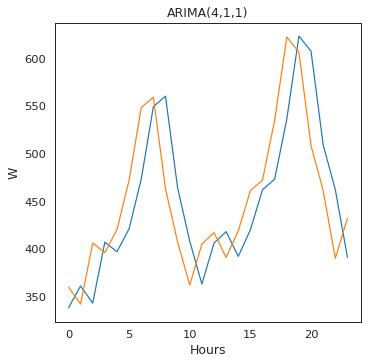

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
#df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
#df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(4,1,1)')
plt.xlabel('Hours')
plt.ylabel('W')